In [4]:
import mne
import sys
import os
import numpy as np
import matplotlib.pyplot as plt


picks = ['Fp1', 'Fp2', 'Fz', 'F3', 'F4', 'F7', 'F8', 'FCz', 'FC3', 'FC4', 'FT7',\
'FT8', 'Cz', 'C3', 'C4', 'T3', 'T4', 'CP3', 'CP4', 'TP7', 'TP8',\
'Pz', 'P3', 'P4', 'T5', 'T6', 'Oz', 'O1', 'O2']
path  = "xxx"
X_S = mne.read_epochs(path, verbose='WARNING')
# print(X_S)
Adquisition_eq = "standard_1020"
montage = mne.channels.make_standard_montage(Adquisition_eq)

X_S.set_montage(montage)

data_all = None
event_all = None

root_path  = "xxx"
sub_files = os.listdir(root_path)
for sub in sub_files:

    ses_files = os.listdir(root_path+sub)
    for ses in ses_files:
        if (sub == 'sub-10' and ses == 'session-1') or \
            (sub == 'sub-10' and ses == 'session-2') or \
            (sub == 'sub-10' and ses == 'session-4') or \
            (sub == 'sub-10' and ses == 'session-5') or \
            (sub == 'sub-11' and ses == 'session-1'):
            continue
        path = os.path.join(root_path, sub, ses)
        fif_file = path + '/eeg-epo.fif'
        # print(fif_file)
        epo_ses = mne.read_epochs(fif_file, verbose='WARNING')
        data = epo_ses._data
        event = epo_ses.events

        if data_all is None:
            data_all = data
            event_all = event
        else:
            data_all = np.vstack((data_all, data))
            event_all = np.vstack((event_all, event))

X_S._data = data_all
X_S.events = event_all
X_averaged = X_S.average()




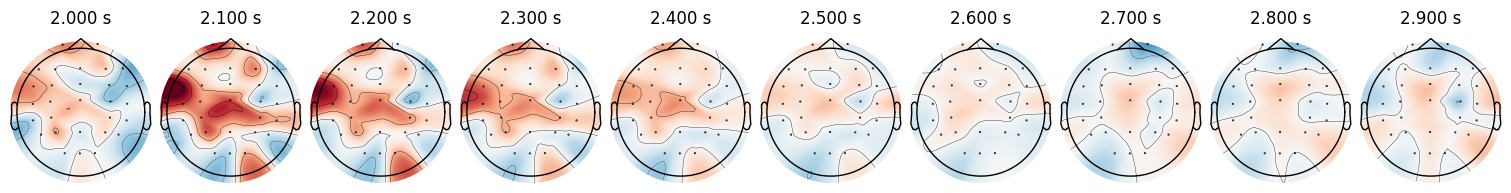

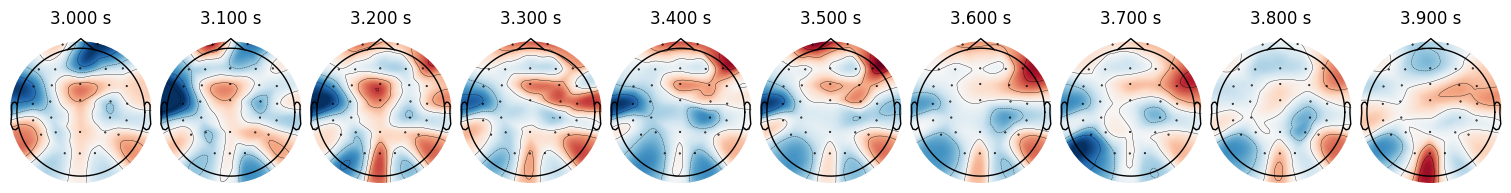

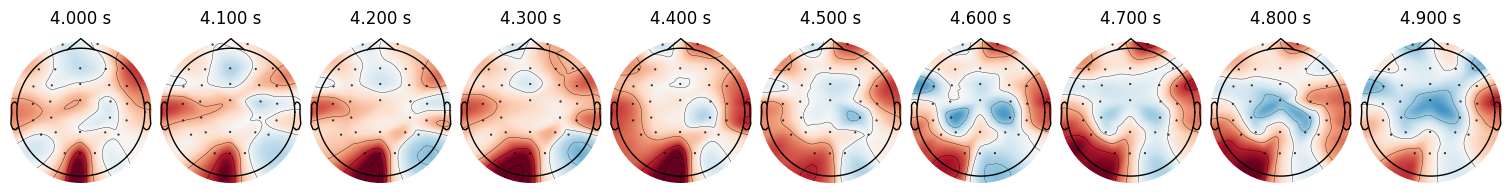

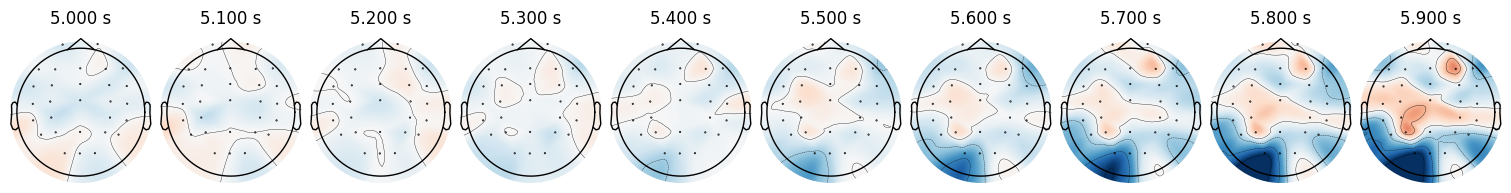

In [5]:

times1 = np.arange(2,3,0.1)
times2 = np.arange(3,4,0.1)
times3 = np.arange(4,5,0.1)
times4 = np.arange(5,6,0.1)
time = [times1,times2,times3,times4]

for i in range(4):
    fig = X_averaged.plot_topomap(times=time[i],colorbar=False)
    fig.savefig(f'fig/topomap{i}.svg',bbox_inches='tight',dpi=300,pad_inches=0.0)
    plt.show()